<a href="https://colab.research.google.com/github/McNealFielies/McNealFielies.github.io/blob/main/Hyperparameter_Tuning_Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the necessery libiries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# importing the models

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# Loading the data into a pandas dataframe

df = pd.read_csv('/content/winequalityN.csv')

In [ ]:
# Let's have a look at the first 5 rows

df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# **LabelEncoding**


We can see that we have a object column named type. In order to use this data we need to convert it in 0 and 1 so that we can train the data

In [ ]:
label_encoder = LabelEncoder()

df['type'] = label_encoder.fit_transform(df['type'])

print(df['type'])

0       1
1       1
2       1
3       1
4       1
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: type, Length: 6497, dtype: int64


In the above code we can see that is has successfully convert it.

0 ------------> Red Wine

1 ------------> White Wine

In [ ]:
df['type'].value_counts()

1    4898
0    1599
Name: type, dtype: int64

In [ ]:
# Let's see how many rows and columns we have

df.shape

(6497, 13)

In [ ]:
# Information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   int64  
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [ ]:
df.describe()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,0.753886,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,0.430779,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,1.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,1.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,1.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,1.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
# Let's see if there are any missing values in the data

df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [ ]:
# Let's remove all the missing values

df = df.dropna()

In [ ]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# **Data Visualizations**

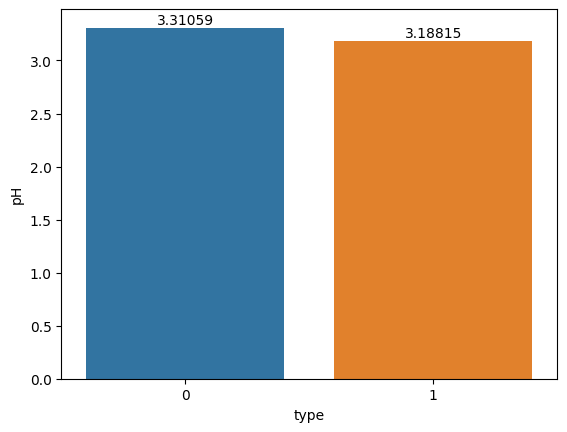

In [ ]:
ax = sns.barplot(x='type', y='pH', data=df, errwidth=0)

for i in ax.containers:
  ax.bar_label(i,)

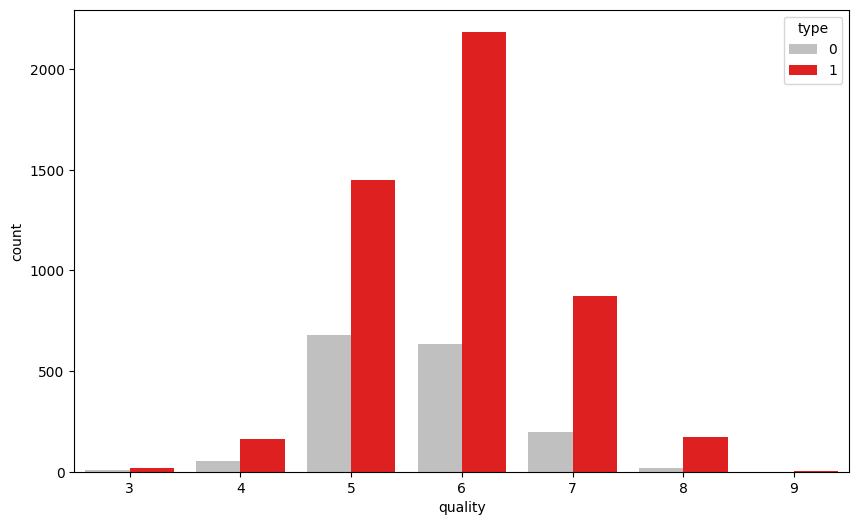

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'quality', hue = 'type', data = df, palette=['silver',"red"])
plt.show()

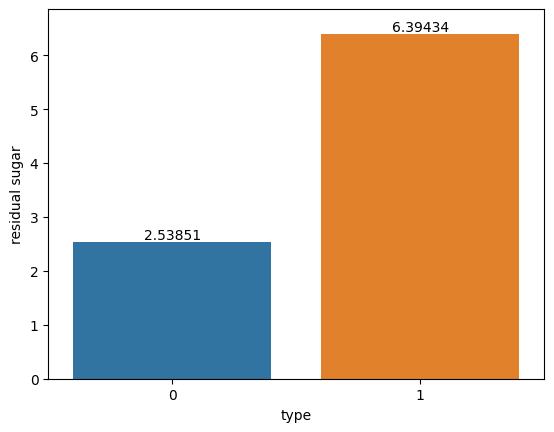

In [ ]:
ax = sns.barplot(x='type', y='residual sugar', data=df, errwidth=0)

for i in ax.containers:
    ax.bar_label(i,)


# **Data Pre-Processing**

In [ ]:
scaler =  StandardScaler()

In [ ]:
x = df.drop(columns=['type'], axis=1)
y = df['type']

# **Splitting the Data into Training and Testing Data**

In [ ]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=1002)

In [ ]:
scaler.fit(x_train)

StandardScaler()

# **Model Building**

In [ ]:
df = df[pd.to_numeric(df['type'], errors='coerce').notna()]

In [ ]:
# The list of models

model_list = [LogisticRegression(max_iter=10000), SVC(), DecisionTreeRegressor(), RandomForestClassifier(random_state=0)]

In [ ]:
# Creating a dictionary that has Hyperparameter values for the models above

model_hyperparameters = {


    'log_reg_hyperparameter':{


          'C' : [1,5,10,20],


   },


    'svc_hyperparameters':{

        'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
         'C' : [1,5,10,20]

    },


    'KNN_hyperparameter' : {

       'n_neighbors' : [3,5,10]



    },

    'random_forest_hyperparameter': {


                                     'n_estimators' : [10,20,50,100]
    },
}

In [ ]:
type(model_hyperparameters)

dict

In [ ]:
print(model_hyperparameters.keys())

dict_keys(['log_reg_hyperparameter', 'svc_hyperparameters', 'KNN_hyperparameter', 'random_forest_hyperparameter'])


In [ ]:
print(model_hyperparameters.values())

dict_values([{'C': [1, 5, 10, 20]}, {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}, {'n_neighbors': [3, 5, 10]}, {'n_estimators': [10, 20, 50, 100]}])


In [ ]:
model_keys = list(model_hyperparameters.keys())

In [ ]:
print(model_keys)

['log_reg_hyperparameter', 'svc_hyperparameters', 'KNN_hyperparameter', 'random_forest_hyperparameter']


In [ ]:
model_hyperparameters['svc_hyperparameters']

{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}

# **Apply GridSeachCV**

In [ ]:
def ModelSelection(list_of_models, Hyperparameter_dictionary):

  result = []

  i = 0

  for model in list_of_models:
    key = model_keys[i]

    params = Hyperparameter_dictionary[key]

    i += 1

    print(model)
    print(params)
    print('------------------------------------------------------------------')

    classifier = GridSearchCV(model, params, cv=5)

    # fitting the data to classifier
    classifier.fit(x,y)

    result.append({

                   'model used' : model,
                   'highest_score' : classifier.best_score_,
                   'best hyperparameter' : classifier.best_params_
    })

    result_dataframe = pd.DataFrame(result, columns= ['model used','highest_score', 'best hyperparameter'])

  return result_dataframe

In [ ]:
ModelSelection(model_list, model_hyperparameters)

LogisticRegression(max_iter=10000)
{'C': [1, 5, 10, 20]}
------------------------------------------------------------------
SVC()
{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}
------------------------------------------------------------------
KNeighborsClassifier()
{'n_neighbors': [3, 5, 10]}
------------------------------------------------------------------
RandomForestClassifier(random_state=0)
{'n_estimators': [10, 20, 50, 100]}
------------------------------------------------------------------


,model used,highest_score,best hyperparameter
0,LogisticRegression(max_iter=10000),0.988240,{'C': 20}
1,SVC(),0.987931,"{'C': 5, 'kernel': 'linear'}"
2,KNeighborsClassifier(),0.938112,{'n_neighbors': 10}
3,RandomForestClassifier(random_state=0),0.993965,{'n_estimators': 100}



# **Conclusion :**


Based on the hyperparameter tuning results on the wine dataset, we evaluated four different models: Logistic Regression, Support Vector Machine (SVM), K-Nearest Neighbors (KNN), and Random Forest. Here are the conclusions drawn from the experiments:

**Logistic Regression:**

The Logistic Regression model achieved an impressive **accuracy score of 0.988240**.
The best hyperparameter found was **{'C': 20}.**
This indicates that the model performed very well in predicting whether a wine is red or white, with an accuracy of approximately **98.8%**.
Logistic Regression can be considered a strong candidate for wine classification based on these results.


**Support Vector Machine (SVM):**

The SVM model achieved a high **accuracy score of 0.987931.**
The best hyperparameter found was {**'C': 5, 'kernel': 'linear'}.**
SVM performed slightly lower than Logistic Regression but still demonstrated excellent accuracy, with an accuracy of approximately **98.8%.**
The linear kernel was selected as the best option for this model, implying that the data might be linearly separable.



**K-Nearest Neighbors (KNN)**:


The KNN model achieved an **accuracy score** of **0.938112.**
The best hyperparameter found was **{'n_neighbors': 10}.**
KNN obtained a lower accuracy compared to the previous models, at around **93.8%.**
While KNN didn't perform as well as the previous models, it may still be a suitable choice if interpretability or computational efficiency is a priority.


**Random Forest:**

The Random Forest model achieved the highest accuracy score of **0.993965.**
The best hyperparameter found was **{'n_estimators': 100}.**
Random Forest outperformed all other models, exhibiting an accuracy of approximately **99.4%.**
This indicates that Random Forest is a **highly accurate model** for wine classification, and the ensemble of decision trees played a crucial role in achieving this result.







In summary, based on the hyperparameter tuning results, the Random Forest model with 100 estimators stands out as the most accurate model for predicting whether a wine is red or white. However, both Logistic Regression and SVM also performed exceptionally well, with accuracy scores above 98%. KNN, while achieving a lower accuracy score, may still be suitable depending on specific requirements. Ultimately, the choice of model should consider factors such as interpretability, computational efficiency, and the importance of accuracy in the given context

# **Let's Do a test on the Quality of The Wine**

In [ ]:
X = df.drop(columns=['quality'], axis=1)
Y = df['quality']

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=1002)

# **Standardize the Data**

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler()

# **Model Building**

In [ ]:
# The list of models

modelsss_list = [LogisticRegression(max_iter=10000000000000), SVC(),SVC(), KNeighborsClassifier(), RandomForestClassifier(random_state=0)]

In [ ]:
# creating a Hyperparameter for the models above

models_hyperparameters = {



    'log_reg_hyperparameter':{


          'C' : [1,5,10,20],


   },


    'svc_hyperparameters':{

        'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
         'C' : [1,5,10,20]

    },


    'KNN_hyperparameter' : {

       'n_neighbors' : [3,5,10]



    },

    'random_forest_hyperparameter': {


                                     'n_estimators' : [10,20,50,100]
    },
}

In [ ]:
type(models_hyperparameters)

dict

In [ ]:
print(models_hyperparameters.keys())


dict_keys(['log_reg_hyperparameter', 'svc_hyperparameters', 'KNN_hyperparameter', 'random_forest_hyperparameter'])


In [ ]:
print(models_hyperparameters.values())

dict_values([{'C': [1, 5, 10, 20]}, {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}, {'n_neighbors': [3, 5, 10]}, {'n_estimators': [10, 20, 50, 100]}])


In [ ]:
models_keys = list(models_hyperparameters.keys())

In [ ]:
print(models_keys)

['log_reg_hyperparameter', 'svc_hyperparameters', 'KNN_hyperparameter', 'random_forest_hyperparameter']


In [ ]:
models_hyperparameters['svc_hyperparameters']

{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}

In [ ]:
def ModelsSelection(list_of_models, Hyperparameters_of_dictionary):

  results = []

  i = 0

  for model in list_of_models:
    key = models_keys[i]
    params = Hyperparameters_of_dictionary[key]

    i += 1

    print(model)
    print(params)
    print('---------------------------------------------------------------------------------------------------------------')

    classifier = GridSearchCV(model, params, cv=5)

    # fitting the data into the classifier

    classifier.fit(X,Y)

    results.append({

                    'model_used' : model,
                    'highest_score' : classifier.best_score_,
                    'best_hyperparameter' : classifier.best_params_
    })

    results_dataframe = pd.DataFrame(results, columns=['Model_Used', 'Highest_Score', 'Best Parameter'])

    return results_dataframe

In [ ]:
ModelsSelection(modelsss_list, models_hyperparameters)

LogisticRegression(max_iter=10000000000000)
{'C': [1, 5, 10, 20]}
---------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi